Loading Libraries 

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

Loading the Data

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')


to check if we have imported the data from the location

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the Passengers survived in the titanic

In [ ]:
print("Passengers in Total", len(titanic))
print("passengers Survived", len(titanic[titanic['Survived']==1]))

Passengers in Total 891
passengers Survived 342


We can check the description but here we dont have much use

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check the percentage of Male and Female in the Ship who survived

In [ ]:

print('% of men who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


The split of passenger class 

In [ ]:
print('% of passengers who survived in first class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('% of passengers who survived in first class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 2]))
print('% of passengers who survived in third class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

% of passengers who survived in first class 62.96296296296296
% of passengers who survived in first class 47.28260869565217
% of passengers who survived in third class 24.236252545824847


Converting the non numeric feature into Numeric feature

In [ ]:

titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

Finding the Missing values in each feature

In [ ]:

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We replace the missing values of Ahe feature with the mean Age from the datas.

In [ ]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling missing values of a categorical variable with mode.

In [ ]:

titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic.Embarked.fillna(value='S', axis = 0, inplace = True)

Then we omit the variables which are not needed or does not impact the Analysis.

In [ ]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

We see no missing values from the Variables that are important

In [ ]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

Separating the Train and Test Data!

In [ ]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [ ]:
!pip install sklearn


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We are BUILDING THE MODEL using the Decision Tree Classifier here

In [ ]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

EVALUATE THE MODEL

In [ ]:

!pip install graphviz

In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9807383627608347
Test accuracy 0.746268656716418


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dot_data= export_graphviz(model, out_file=None, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True)

In [ ]:
graph1=graphviz.Source(dot_data)

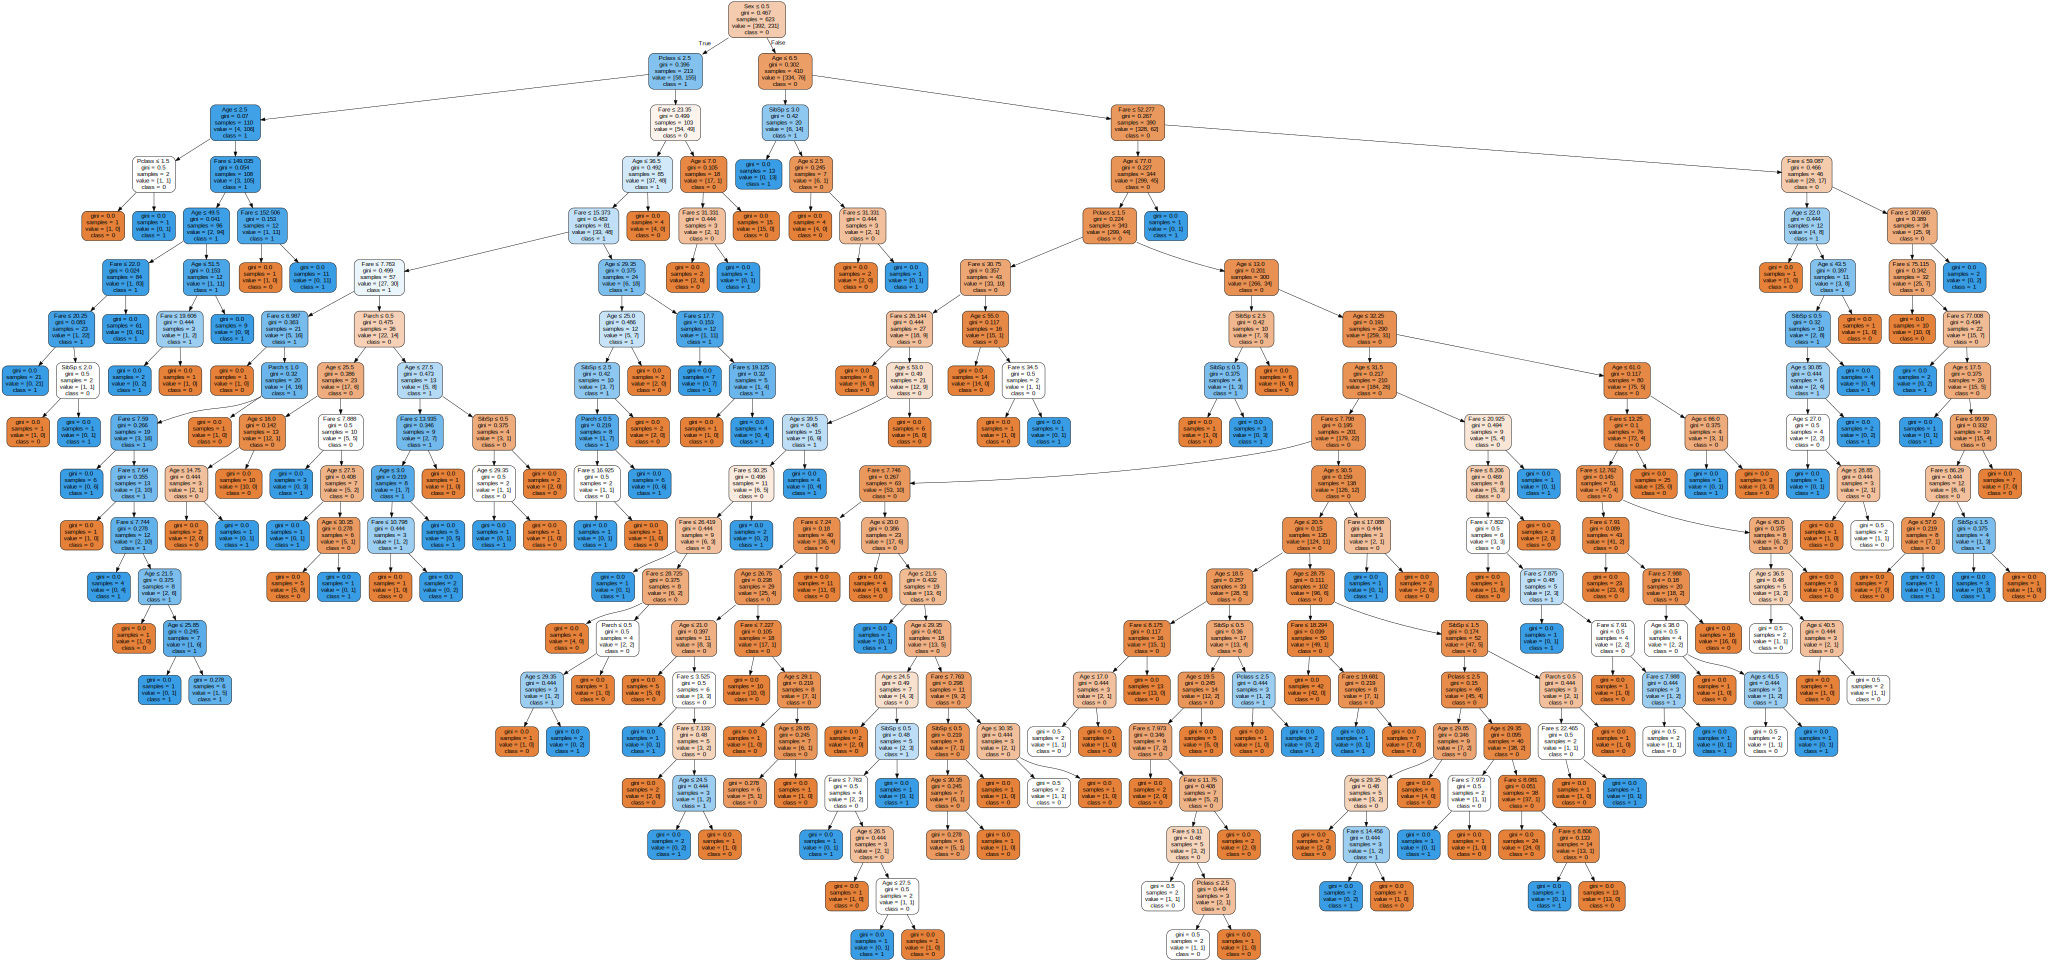

In [ ]:
graph1

In [ ]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8314606741573034
test score... 0.8097014925373134


In [ ]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True)

In [ ]:
graph2=graphviz.Source(dot_data)

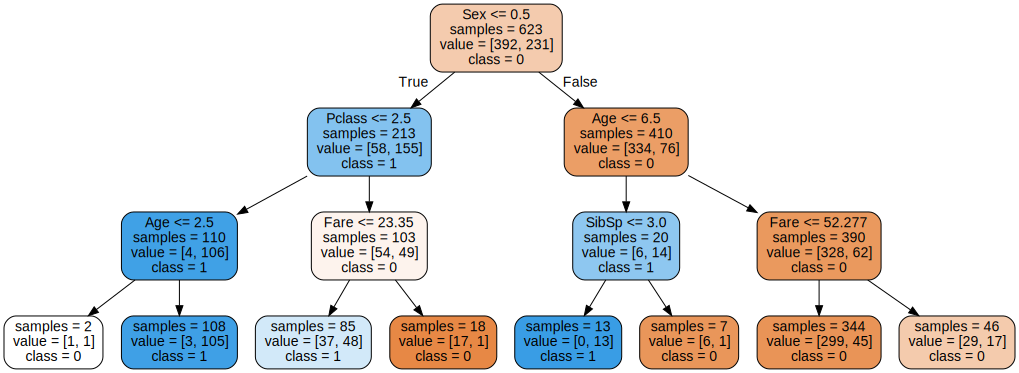

In [ ]:
graph2